In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-69.55479934856743 38.29756803238649
-26.665384411531114 129.62414127673736
3.2852885416398436 -109.12763110983263
-16.04030518313573 -72.81907351760452
-56.499314204461264 34.381196638517
-88.13718788145064 11.986998704152711
25.12513166142587 -37.12260399948278
-37.313683632166274 -70.79417715649087
-48.04517982775251 35.844440262283086
80.78589993699376 -72.1120675547113
-14.307206411005254 -90.44718621547493
47.277081259711736 133.84503969415687
67.93540891175752 87.18981348583418
-39.42091635578363 -150.6642554606286
-60.55046857671838 -0.540704244489632
27.332993819898817 151.88231254189685
62.965046020438194 -124.4354508078425
1.5674382053001068 70.29706316687947
13.425613746478575 45.90655999960626
34.803232607395685 -35.061707181965915
30.150849023823667 -82.14243377017713
-86.06067558753348 49.49426750498779
74.90105161621727 -33.66859583325822
62.00310733080937 -159.7649313479618
-79.38863441958341 64.59950977755895
30.884189219956994 169.83919355231586
4.396661952260544 158

64.25613924678586 143.8201454014059
47.1907435343725 -160.45463399577372
82.2865738577978 -117.26860403513581
-38.86340691184654 79.72355000736121
-64.34377201156256 -73.39950826351823
-28.69628750171502 6.769484796124544
-22.885531978430677 56.34731301601806
-16.032249099900383 142.8323757277476
55.47995323405681 -34.44886401908403
78.56442677574185 -17.788503855449818
17.936254280831065 -118.49000738534849
-47.3598481504224 -130.75567148135437
37.95310054721395 63.45214055096133
14.41016110057869 160.4227316345279
-20.444295505564412 -97.63201797647747
18.636963915731044 174.36601946627474
-31.146673949748532 57.9407395699954
-64.18388643933847 171.5441668840988
-30.907464951695083 -45.926564774513
68.97607321937895 35.272874757089625
28.560165018739227 131.25360995346585
18.733701897092544 -134.09101330222288
3.2668526599412644 -56.53306122399489


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

586

In [7]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [8]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q="

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each
    
    city_url = url + city.replace(" ","+") + "&appid="+ weather_api_key

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | ixtapa
Processing Record 4 of Set 1 | corrales
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | coihueco
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | lermontovka
Processing Record 12 of Set 1 | snezhnogorsk
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | kudahuvadhoo
Processing Record 18 of Set 1 | aden
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | lakeside
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | dayong
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | san jose
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | sarakhs
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | kangaatsiaq
Processing Record 50 of Set 4 | salihorsk
Processing Record 1 of Set 5 | bokspits
City not found. Skipping...
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | chiang rai
Processing Record 4 of Set 5 | pangkalanbuun
Processing Record 5 of Set 5 | bonthe
Processing Record 6 of Set 5 | filomeno mata
Processing Record 7 of Set 5 | mahibadhoo
Processing Record 8 of Set 5 | madimba
Processing Record 9 of Set 5 | mahon
Processing Record 10 of Set 5 | mombasa
Processing Record 11 of Set 5 | aklavik
Processing Record 1

Processing Record 32 of Set 8 | verkhoyansk
Processing Record 33 of Set 8 | natal
Processing Record 34 of Set 8 | haverfordwest
Processing Record 35 of Set 8 | rocha
Processing Record 36 of Set 8 | barentu
Processing Record 37 of Set 8 | piacabucu
Processing Record 38 of Set 8 | ponferrada
Processing Record 39 of Set 8 | fershampenuaz
Processing Record 40 of Set 8 | finnsnes
Processing Record 41 of Set 8 | khonuu
City not found. Skipping...
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | ajdabiya
Processing Record 44 of Set 8 | milot
Processing Record 45 of Set 8 | solnechnyy
Processing Record 46 of Set 8 | lima
Processing Record 47 of Set 8 | ulladulla
Processing Record 48 of Set 8 | kholodnyy
Processing Record 49 of Set 8 | marawi
Processing Record 50 of Set 8 | mocuba
Processing Record 1 of Set 9 | alberton
Processing Record 2 of Set 9 | winsum
Processing Record 3 of Set 9 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 9 | hohoe
Proc

Processing Record 18 of Set 12 | igrim
Processing Record 19 of Set 12 | jabinyanah
Processing Record 20 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 21 of Set 12 | atar
Processing Record 22 of Set 12 | santa maria del oro
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 25 of Set 12 | karratha
Processing Record 26 of Set 12 | bloomfield
Processing Record 27 of Set 12 | nhulunbuy
Processing Record 28 of Set 12 | aflu
City not found. Skipping...
Processing Record 29 of Set 12 | enumclaw
Processing Record 30 of Set 12 | severnoye
Processing Record 31 of Set 12 | quepos
Processing Record 32 of Set 12 | edendale
Processing Record 33 of Set 12 | mae hong son
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 12 | sayat
Processing Record 36 of Set 12 | grand-santi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
len(city_data)

539

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,52.18,83,0,1.01,ZA,2022-07-26 00:12:47
1,Yulara,-25.2406,130.9889,51.22,52,0,17.02,AU,2022-07-26 00:12:47
2,Ixtapa,20.7000,-105.2000,85.23,79,75,8.05,MX,2022-07-26 00:10:52
3,Corrales,35.2378,-106.6067,88.95,38,63,23.00,US,2022-07-26 00:12:16
4,Hermanus,-34.4187,19.2345,50.81,54,0,8.41,ZA,2022-07-26 00:12:48
5,Ponta Do Sol,32.6667,-17.1000,81.23,46,59,5.46,PT,2022-07-26 00:12:49
6,Coihueco,-36.6167,-71.8333,50.74,87,100,19.57,CL,2022-07-26 00:12:50
7,East London,-33.0153,27.9116,55.44,70,0,12.08,ZA,2022-07-26 00:09:45
8,Qaanaaq,77.4840,-69.3632,43.12,66,5,0.85,GL,2022-07-26 00:12:51
9,Chicama,-7.8447,-79.1469,59.54,82,22,6.24,PE,2022-07-26 00:12:51


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-26 00:12:47,-33.5906,26.8910,52.18,83,0,1.01
1,Yulara,AU,2022-07-26 00:12:47,-25.2406,130.9889,51.22,52,0,17.02
2,Ixtapa,MX,2022-07-26 00:10:52,20.7000,-105.2000,85.23,79,75,8.05
3,Corrales,US,2022-07-26 00:12:16,35.2378,-106.6067,88.95,38,63,23.00
4,Hermanus,ZA,2022-07-26 00:12:48,-34.4187,19.2345,50.81,54,0,8.41
5,Ponta Do Sol,PT,2022-07-26 00:12:49,32.6667,-17.1000,81.23,46,59,5.46
6,Coihueco,CL,2022-07-26 00:12:50,-36.6167,-71.8333,50.74,87,100,19.57
7,East London,ZA,2022-07-26 00:09:45,-33.0153,27.9116,55.44,70,0,12.08
8,Qaanaaq,GL,2022-07-26 00:12:51,77.4840,-69.3632,43.12,66,5,0.85
9,Chicama,PE,2022-07-26 00:12:51,-7.8447,-79.1469,59.54,82,22,6.24


In [14]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1658799842.5570273

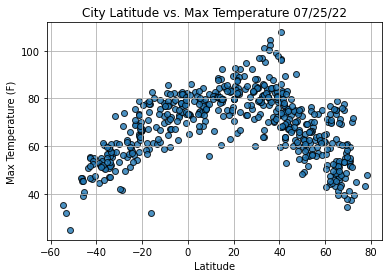

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

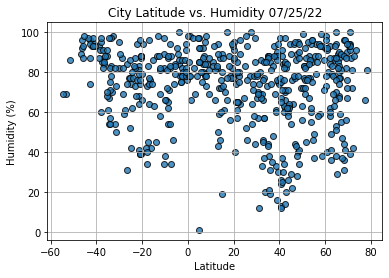

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

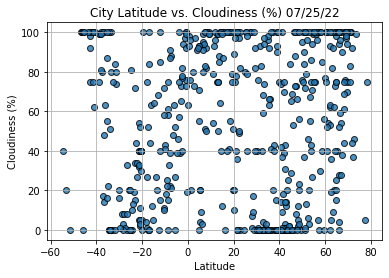

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

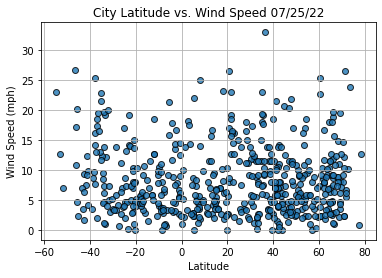

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [21]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

index13

City                    Cape Town
Country                        ZA
Date          2022-07-26 00:12:53
Lat                      -33.9258
Lng                       18.4232
Max Temp                    58.37
Humidity                       71
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
534    False
535     True
536    False
537     True
538     True
Name: Lat, Length: 539, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ixtapa,MX,2022-07-26 00:10:52,20.7000,-105.2000,85.23,79,75,8.05
3,Corrales,US,2022-07-26 00:12:16,35.2378,-106.6067,88.95,38,63,23.00
5,Ponta Do Sol,PT,2022-07-26 00:12:49,32.6667,-17.1000,81.23,46,59,5.46
8,Qaanaaq,GL,2022-07-26 00:12:51,77.4840,-69.3632,43.12,66,5,0.85
10,Lermontovka,RU,2022-07-26 00:12:52,47.1453,134.3383,70.18,86,73,3.69


In [25]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

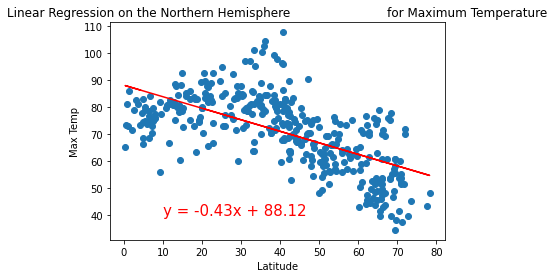

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

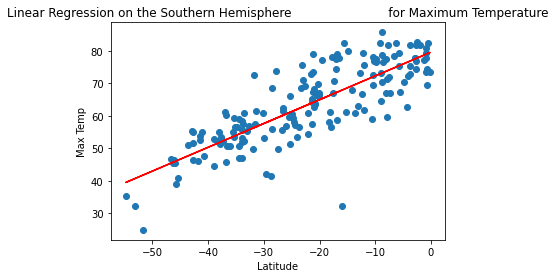

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

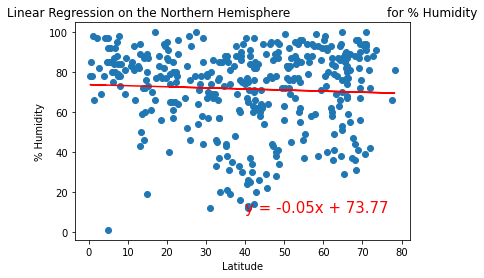

In [28]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

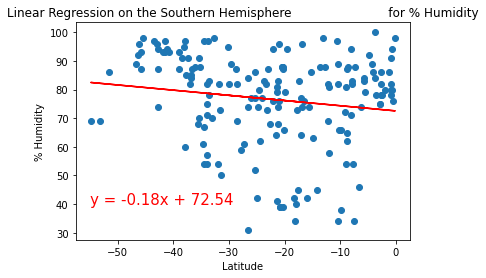

In [35]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,40))

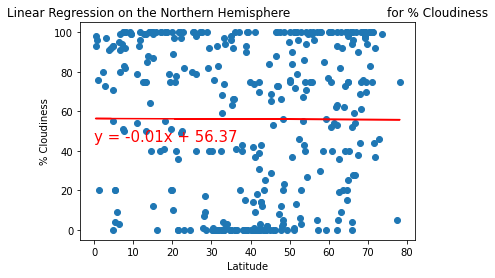

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,45))

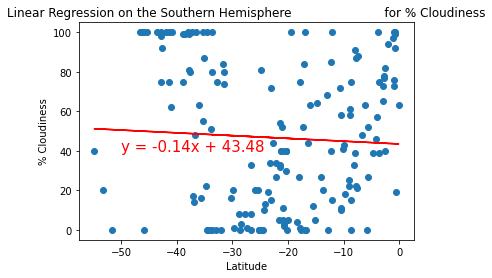

In [38]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,40))

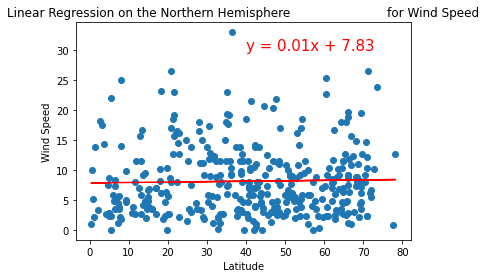

In [39]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

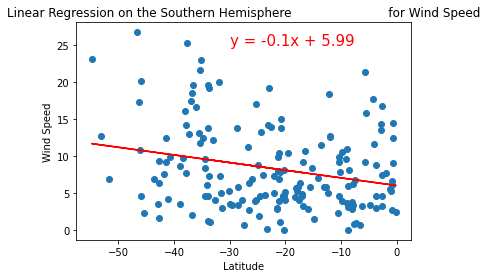

In [40]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))